<a href="https://colab.research.google.com/github/Mayuri-thatikonda/diabetes_prediction/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataset=pd.read_csv('diabetes_prediction.csv')
dataset.tail()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [3]:
print(dataset.columns)

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')


In [4]:
dataset.nunique()

Age                   51
Gender                 2
Polyuria               2
Polydipsia             2
sudden weight loss     2
weakness               2
Polyphagia             2
Genital thrush         2
visual blurring        2
Itching                2
Irritability           2
delayed healing        2
partial paresis        2
muscle stiffness       2
Alopecia               2
Obesity                2
class                  2
dtype: int64

In [5]:
dataset.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [7]:
print(dataset.columns)

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')


In [8]:
dataset.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [9]:
dataset.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [10]:
dataset.shape

(520, 17)

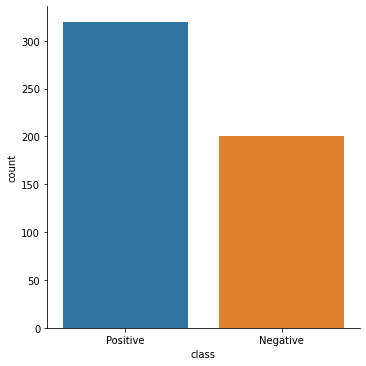

In [11]:
import seaborn as sns
sns.catplot(x='class', data=dataset, kind='count');


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset = dataset[['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class',]].apply(le.fit_transform)
print(dataset)

     Gender  Polyuria  Polydipsia  ...  Alopecia  Obesity  class
0         1         0           1  ...         1        1      1
1         1         0           0  ...         1        0      1
2         1         1           0  ...         1        0      1
3         1         0           0  ...         0        0      1
4         1         1           1  ...         1        1      1
..      ...       ...         ...  ...       ...      ...    ...
515       0         1           1  ...         0        0      1
516       0         1           1  ...         0        0      1
517       0         1           1  ...         0        1      1
518       0         0           0  ...         1        0      0
519       1         0           0  ...         0        0      0

[520 rows x 16 columns]


In [17]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values



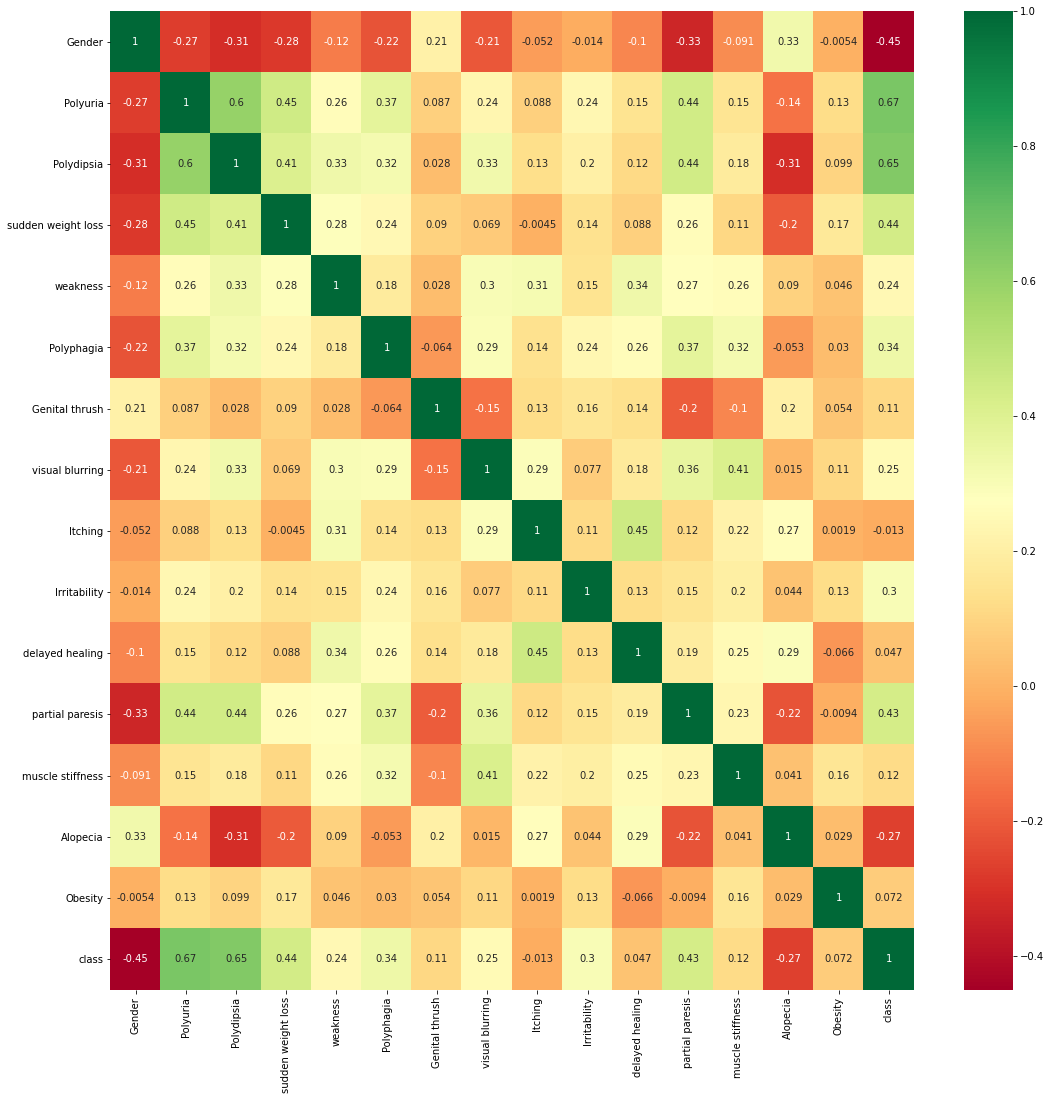

In [18]:
import seaborn as sns
plt.figure(figsize=(18,18))
hm=sns.heatmap(dataset.corr(),annot=True,cmap="RdYlGn")
plt.show()


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
X_train, X_test, y_train, y_test = train_test_split(
       X, y,test_size = 0.2, random_state=0)
reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(
       X_train, y_train)

In [20]:
print(reg.feature_importances_)


[0.1137534  0.44875549 0.0830507  0.01933292 0.01797541 0.01262116
 0.04849295 0.02341252 0.02228001 0.02885249 0.03116244 0.01100171
 0.03549413 0.06700595 0.03680872]


In [21]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

[[0.7 1. ]
 [1.  1. ]
 [1.  1. ]
 [0.  0. ]
 [0.  0. ]
 [1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [0.9 1. ]
 [1.  1. ]
 [1.  1. ]
 [0.  0. ]
 [0.7 1. ]
 [1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [0.  0. ]
 [1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.9 1. ]
 [1.  1. ]
 [0.  0. ]
 [1.  1. ]
 [1.  1. ]
 [0.  0. ]
 [0.  0. ]
 [1.  1. ]
 [1.  1. ]
 [0.6 1. ]
 [1.  1. ]
 [0.  0. ]
 [1.  1. ]
 [1.  1. ]
 [0.4 1. ]
 [0.  0. ]
 [1.  1. ]
 [0.  0. ]
 [0.  0. ]
 [1.  1. ]
 [1.  1. ]
 [0.1 0. ]
 [1.  1. ]
 [0.1 0. ]
 [1.  1. ]
 [0.  0. ]
 [1.  1. ]
 [0.  0. ]
 [1.  1. ]
 [0.2 1. ]
 [1.  1. ]
 [0.9 1. ]
 [1.  1. ]
 [1.  1. ]
 [0.  0. ]
 [0.  0. ]
 [1.  1. ]
 [0.  0. ]
 [1.  1. ]
 [0.  0. ]
 [1.  1. ]
 [0.  0. ]
 [1.  1. ]
 [1.  1. ]
 [0.  0. ]
 [0.  0. ]
 [1.  1. ]
 [0.9 1. ]
 [0.  0. ]
 [1.  1. ]
 [0.  0. ]
 [1.  1. ]
 [1.  1. ]
 [0.  0. ]
 [1.  1. ]
 [1.  1. ]
 [0.  0. ]
 [0.  0. ]
 [1.  1. ]
 [0.1 0. ]
 [1.  1. ]
 [1.  1. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]

0.93865625

In [22]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


0.878125

In [24]:
y = y.reshape(len(y),1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

[[ 0.95  1.  ]
 [ 0.91  1.  ]
 [ 1.02  1.  ]
 [ 0.05  0.  ]
 [ 0.13  0.  ]
 [ 1.05  1.  ]
 [ 1.04  1.  ]
 [ 0.95  1.  ]
 [ 0.95  1.  ]
 [ 1.09  1.  ]
 [ 0.69  1.  ]
 [-0.    0.  ]
 [ 0.95  1.  ]
 [ 1.05  1.  ]
 [ 0.95  1.  ]
 [ 1.02  1.  ]
 [ 0.05  0.  ]
 [ 0.99  1.  ]
 [ 0.95  1.  ]
 [ 1.02  1.  ]
 [ 0.96  1.  ]
 [ 0.95  1.  ]
 [ 0.95  1.  ]
 [ 0.05  0.  ]
 [ 0.05  0.  ]
 [ 0.05  0.  ]
 [ 0.95  1.  ]
 [ 0.95  1.  ]
 [ 0.25  0.  ]
 [ 0.95  1.  ]
 [ 1.03  1.  ]
 [ 0.05  0.  ]
 [ 0.21  0.  ]
 [ 1.05  1.  ]
 [ 1.01  1.  ]
 [ 0.95  1.  ]
 [ 0.99  1.  ]
 [-0.04  0.  ]
 [ 1.02  1.  ]
 [ 1.04  1.  ]
 [ 1.09  1.  ]
 [-0.05  0.  ]
 [ 1.05  1.  ]
 [ 0.05  0.  ]
 [ 0.05  0.  ]
 [ 1.02  1.  ]
 [ 1.05  1.  ]
 [ 0.08  0.  ]
 [ 1.05  1.  ]
 [ 0.05  0.  ]
 [ 0.99  1.  ]
 [ 0.05  0.  ]
 [ 1.02  1.  ]
 [ 0.05  0.  ]
 [ 1.05  1.  ]
 [ 0.54  1.  ]
 [ 1.01  1.  ]
 [ 0.87  1.  ]
 [ 0.95  1.  ]
 [ 1.02  1.  ]
 [ 0.05  0.  ]
 [-0.2   0.  ]
 [ 1.09  1.  ]
 [ 0.13  0.  ]
 [ 0.99  1.  ]
 [ 0.35  0.  ]
 [ 0.88  1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9507156229005251

In [25]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 84.67 %
Standard Deviation: 9.49 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin